In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = [[[i+j] for i in range(5)] for j in range(100)]
X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

In [3]:
y = [(i+5) for i in range(100)]
y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

In [4]:
X.shape, y.shape

AttributeError: ignored

In [5]:
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X.shape, y.shape

((100, 5, 1), (100,))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

In [7]:
from keras import models, layers

model = models.Sequential(name='SimpleRNN_1')
model.add(layers.SimpleRNN(3, input_shape=(5,1), return_sequences=False))
model.add(layers.Dense(1))
model.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [9]:
%%time

Hist = model.fit(X_train, y_train, epochs=500, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/500
10/10 [==============================] - 4s 63ms/step - loss: 3987.0370 - accuracy: 0.0000e+00 - val_loss: 3662.7402 - val_accuracy: 0.0000e+00
Epoch 2/500
10/10 [==============================] - 0s 11ms/step - loss: 3426.6065 - accuracy: 0.0000e+00 - val_loss: 3658.5300 - val_accuracy: 0.0000e+00
Epoch 3/500
10/10 [==============================] - 0s 11ms/step - loss: 3911.9440 - accuracy: 0.0000e+00 - val_loss: 3654.2332 - val_accuracy: 0.0000e+00
Epoch 4/500
10/10 [==============================] - 0s 13ms/step - loss: 3924.5401 - accuracy: 0.0000e+00 - val_loss: 3649.9907 - val_accuracy: 0.0000e+00
Epoch 5/500
10/10 [==============================] - 0s 14ms/step - loss: 3333.7512 - accuracy: 0.0000e+00 - val_loss: 3645.8354 - val_accuracy: 0.0000e+00
Epoch 6/500
10/10 [==============================] - 0s 11ms/step - loss: 3965.1381 - accuracy: 0.0000e+00 - val_loss: 3641.5652 - val_accuracy: 0.0000e+00
Epoch 7/500
10/10 [==============================] - 0s 11ms/ste

In [10]:
y_hat = model.predict(X_test)

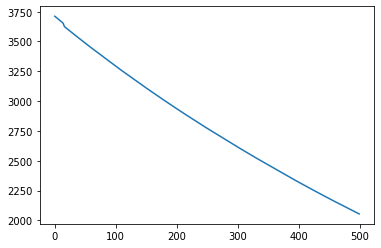

In [11]:
plt.plot(Hist.history['loss'])
plt.show()

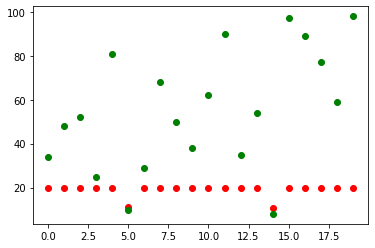

In [13]:
plt.scatter(range(20), y_hat, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

In [14]:
# Normalization

X = [[[(i+j)] for i in range(5)] for j in range(100)]
y = [(i+5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y)) - np.min(y)

In [15]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

In [17]:
model_2 = models.Sequential(name='SimpleRNN_2')
model_2.add(layers.SimpleRNN(3, input_shape=(None,1), return_sequences=False))
model_2.add(layers.Dense(1))
model_2.summary()

model_2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [18]:
%%time

Hist_2 = model_2.fit(X_train, y_train, epochs=300, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/300
10/10 [==============================] - 1s 40ms/step - loss: 18.5593 - accuracy: 0.0000e+00 - val_loss: 17.8443 - val_accuracy: 0.0000e+00
Epoch 2/300
10/10 [==============================] - 0s 11ms/step - loss: 18.2422 - accuracy: 0.0000e+00 - val_loss: 17.4831 - val_accuracy: 0.0000e+00
Epoch 3/300
10/10 [==============================] - 0s 12ms/step - loss: 17.5878 - accuracy: 0.0000e+00 - val_loss: 17.1170 - val_accuracy: 0.0000e+00
Epoch 4/300
10/10 [==============================] - 0s 12ms/step - loss: 17.4104 - accuracy: 0.0000e+00 - val_loss: 16.7431 - val_accuracy: 0.0000e+00
Epoch 5/300
10/10 [==============================] - 0s 12ms/step - loss: 16.3192 - accuracy: 0.0000e+00 - val_loss: 16.3634 - val_accuracy: 0.0000e+00
Epoch 6/300
10/10 [==============================] - 0s 11ms/step - loss: 16.6514 - accuracy: 0.0000e+00 - val_loss: 15.9762 - val_accuracy: 0.0000e+00
Epoch 7/300
10/10 [==============================] - 0s 10ms/step - loss: 16.2242 - accu

In [19]:
y_hat = model_2.predict(X_test)

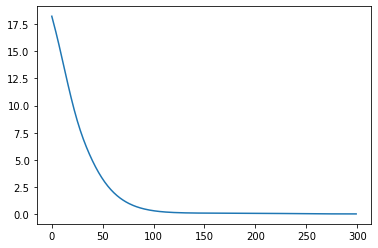

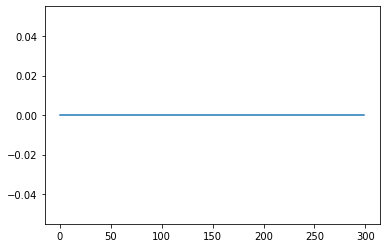

In [20]:
plt.plot(Hist_2.history['loss'])
plt.show()

plt.plot(Hist_2.history['accuracy'])
plt.show()

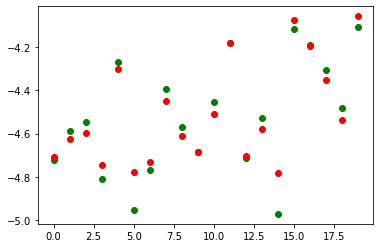

In [22]:
plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), y_hat, c='r')

plt.show()

In [24]:
model_4 = models.Sequential(name='Stackd_RNN')
model_4.add(layers.SimpleRNN(3, input_shape=(None,1), return_sequences=True))
model_4.add(layers.SimpleRNN(3, input_shape=(None,1), return_sequences=False))
model_4.add(layers.Dense(1))
model_4.summary()

model_4.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Model: "Stackd_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [26]:
%%time

Hist_4 = model_4.fit(X_train, y_train, epochs=300, batch_size=8, validation_data=(X_test,y_test))

Epoch 1/300
10/10 [==============================] - 2s 71ms/step - loss: 26.6446 - accuracy: 0.0000e+00 - val_loss: 24.4874 - val_accuracy: 0.0000e+00
Epoch 2/300
10/10 [==============================] - 0s 14ms/step - loss: 23.7806 - accuracy: 0.0000e+00 - val_loss: 21.1958 - val_accuracy: 0.0000e+00
Epoch 3/300
10/10 [==============================] - 0s 14ms/step - loss: 20.6076 - accuracy: 0.0000e+00 - val_loss: 18.2023 - val_accuracy: 0.0000e+00
Epoch 4/300
10/10 [==============================] - 0s 15ms/step - loss: 17.4465 - accuracy: 0.0000e+00 - val_loss: 15.7728 - val_accuracy: 0.0000e+00
Epoch 5/300
10/10 [==============================] - 0s 15ms/step - loss: 15.2750 - accuracy: 0.0000e+00 - val_loss: 13.9818 - val_accuracy: 0.0000e+00
Epoch 6/300
10/10 [==============================] - 0s 14ms/step - loss: 13.5801 - accuracy: 0.0000e+00 - val_loss: 12.7130 - val_accuracy: 0.0000e+00
Epoch 7/300
10/10 [==============================] - 0s 15ms/step - loss: 12.6595 - accu

In [27]:
y_hat = model_4.predict(X_test)

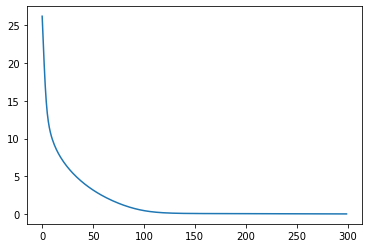

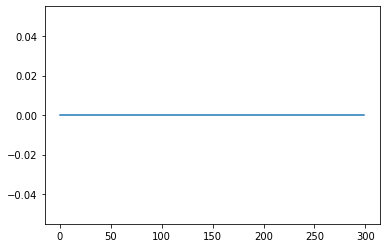

In [28]:
plt.plot(Hist_4.history['loss'])
plt.show()

plt.plot(Hist_4.history['accuracy'])
plt.show()

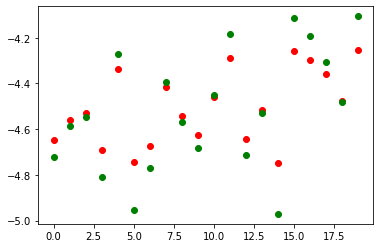

In [30]:
plt.scatter(range(20), y_hat, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

In [33]:
X = [[[i+j] for i in range(5)] for j in range(100)]
y = [i+5 for i in range(100)]

X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

In [35]:
X_test[0].shape

(5, 1)

In [36]:
X_test[0].reshape(1,5,1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

In [39]:
X_test[0]

array([[29.],
       [30.],
       [31.],
       [32.],
       [33.]])

In [45]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1, input_shape=(5,1), return_sequences=False))

Model_False.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


In [46]:
Model_False.predict(X_test[0].reshape(1,5,1))

array([[-0.99999976]], dtype=float32)

In [47]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(3, input_shape=(5,1), return_sequences=False))

Model_False.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [48]:
Model_False.predict(X_test[0].reshape(1,5,1))

array([[-0.99999976,  0.99999976,  0.99999976]], dtype=float32)

In [49]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1, input_shape=(5,1), return_sequences=True))

Model_True.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [50]:
Model_True.predict(X_test[0].reshape(1,5,1))

array([[[-0.99999976],
        [-0.99999976],
        [-0.99999976],
        [-0.99999976],
        [-0.99999976]]], dtype=float32)

In [51]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3, input_shape=(5,1), return_sequences=True))
Model_True.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [52]:
Model_True.predict(X_test[0].reshape(1,5,1))

array([[[-0.99999976, -0.99999976,  0.99999976],
        [-0.99999976, -0.99999976,  0.99999976],
        [-0.99999976, -0.99999976,  0.99999976],
        [-0.99999976, -0.99999976,  0.99999976],
        [-0.99999976, -0.99999976,  0.99999976]]], dtype=float32)